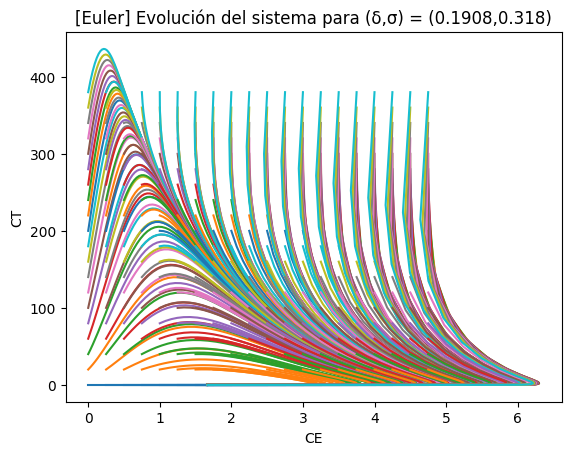

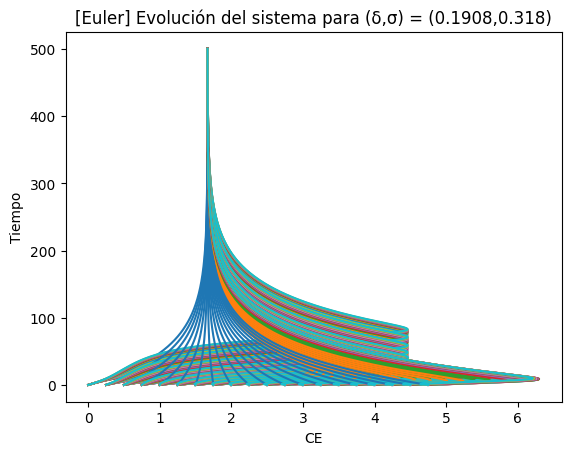

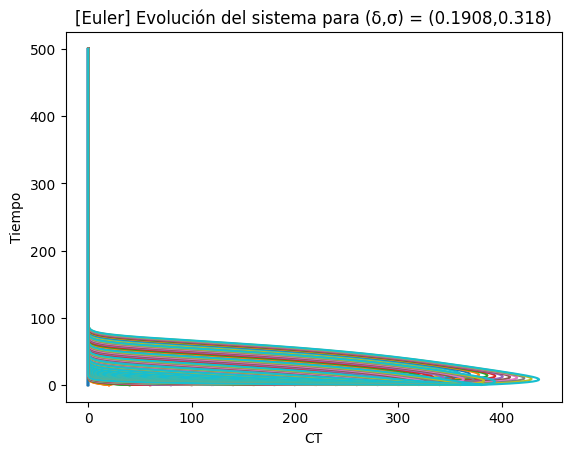

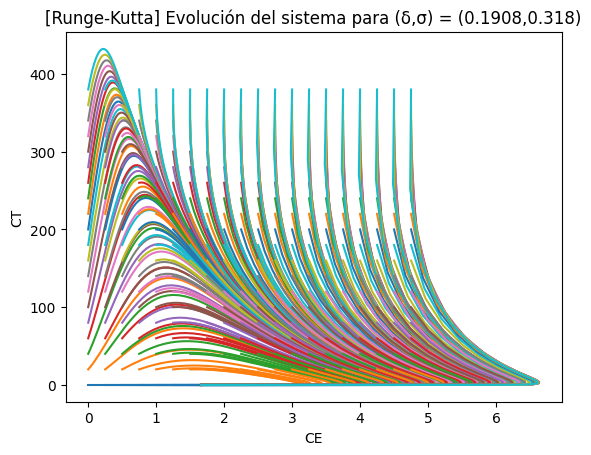

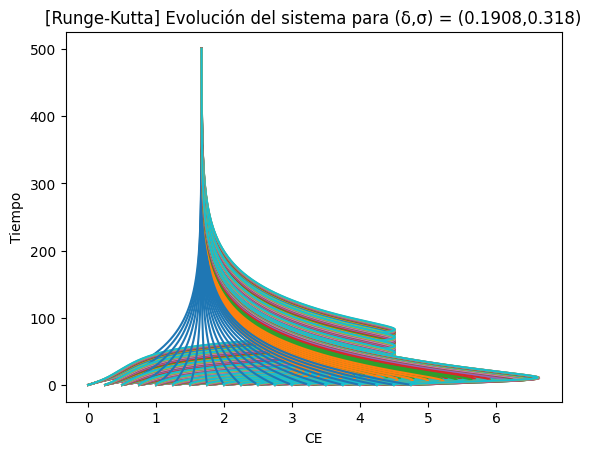

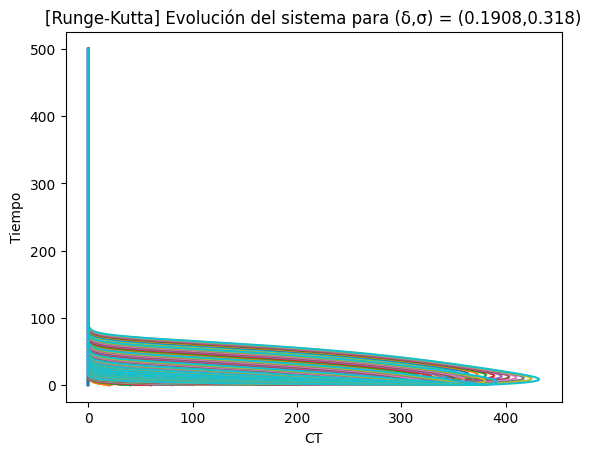

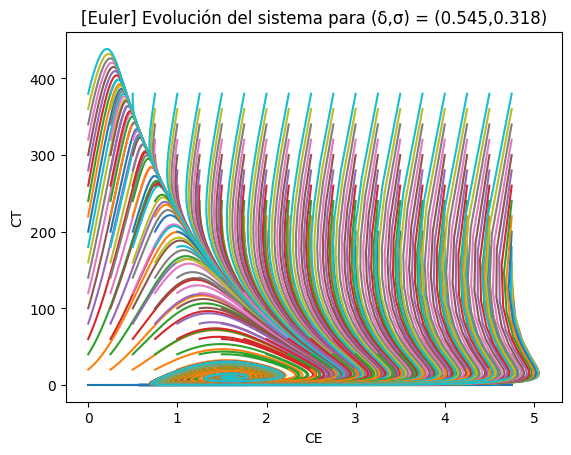

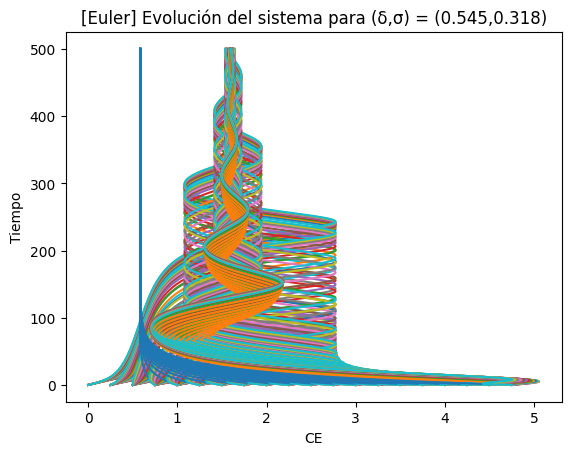

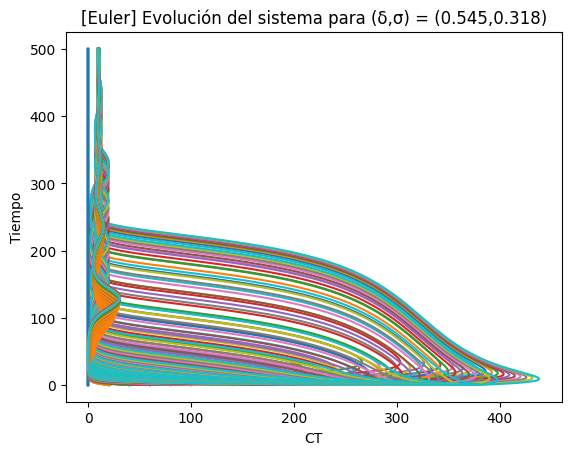

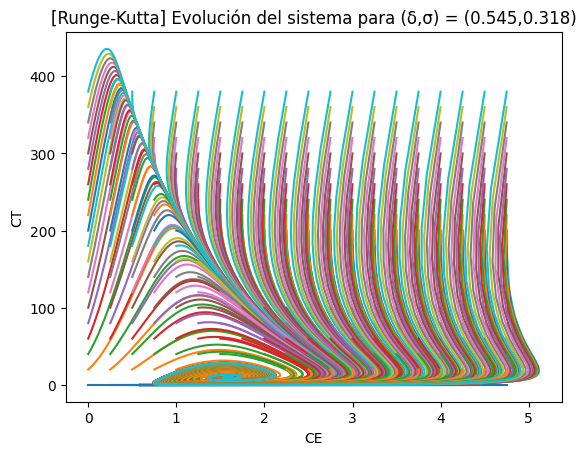

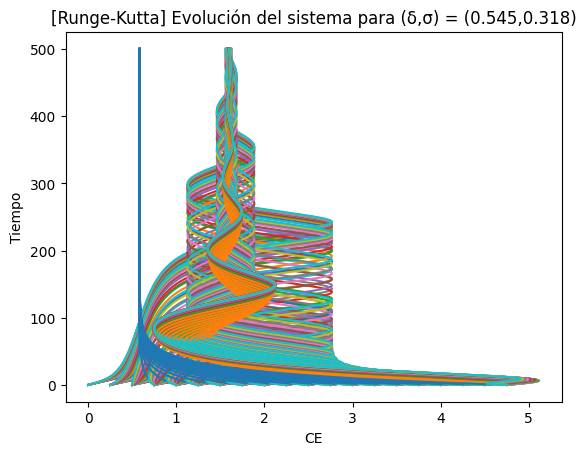

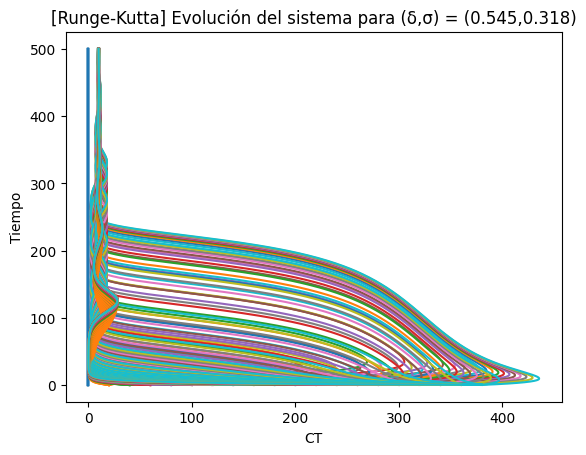

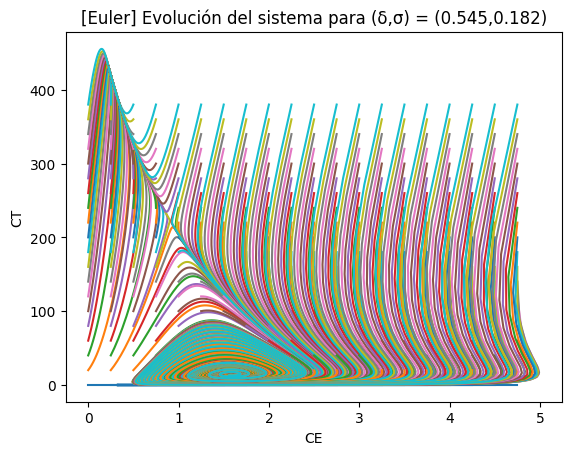

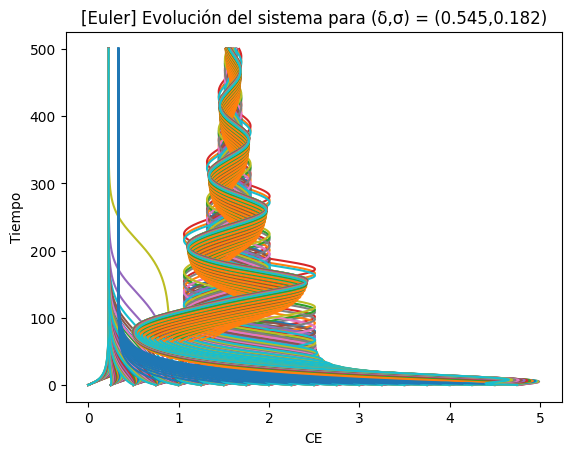

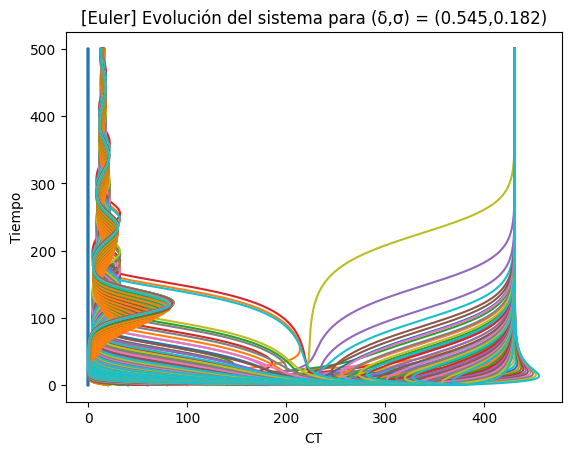

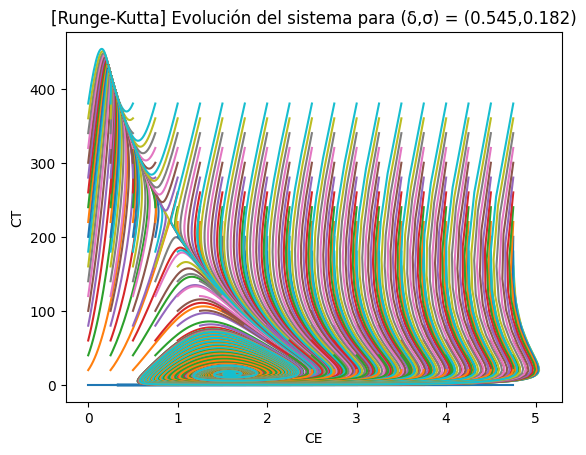

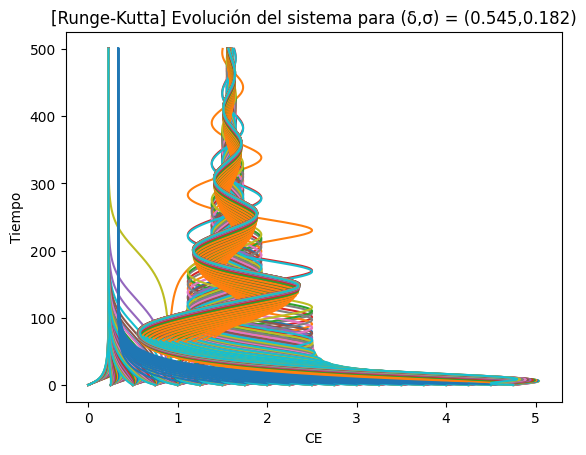

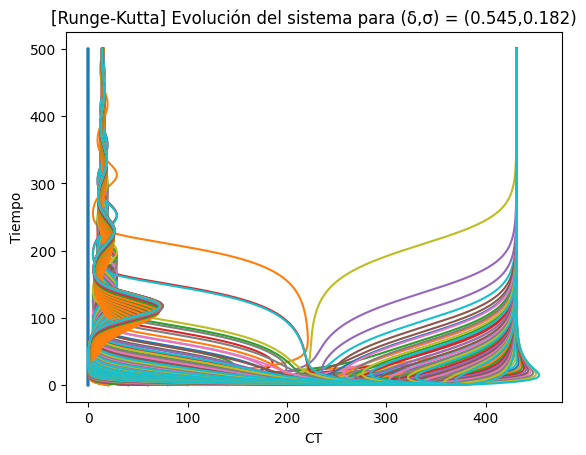

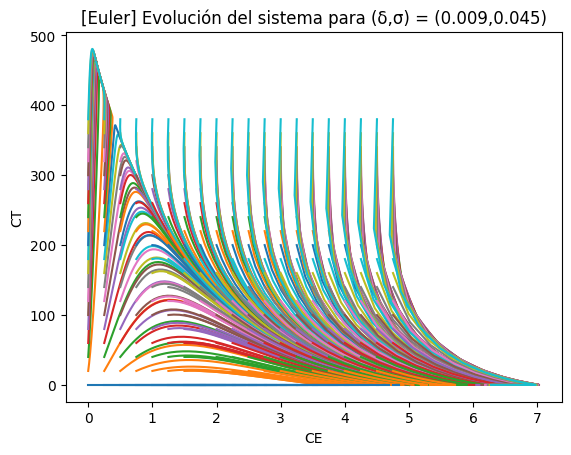

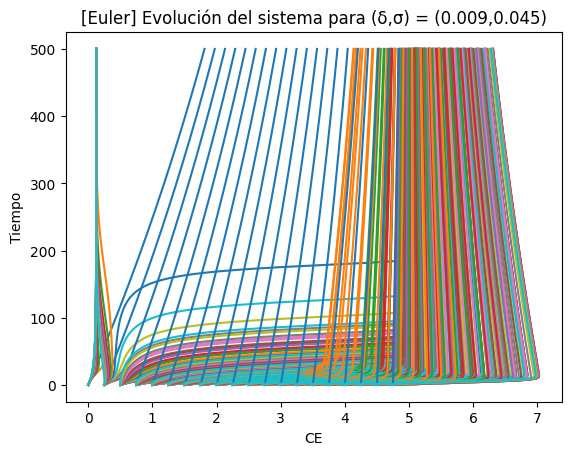

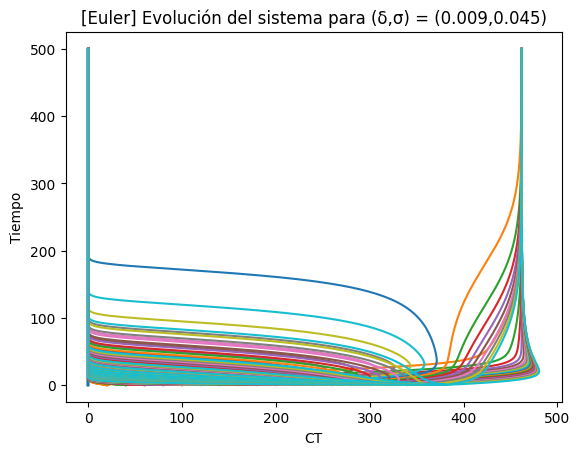

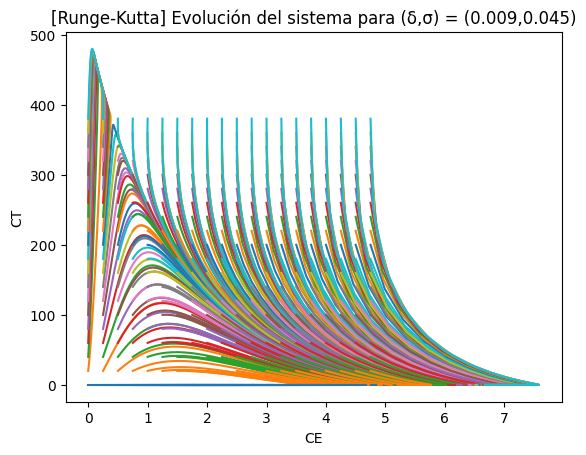

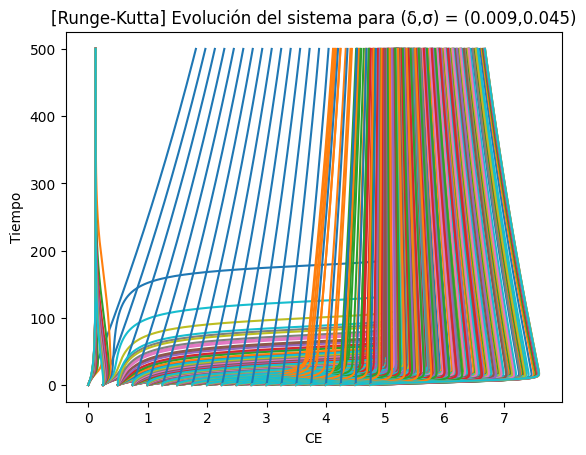

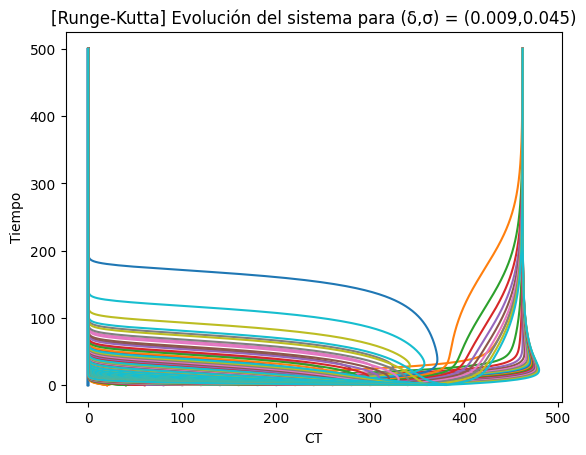

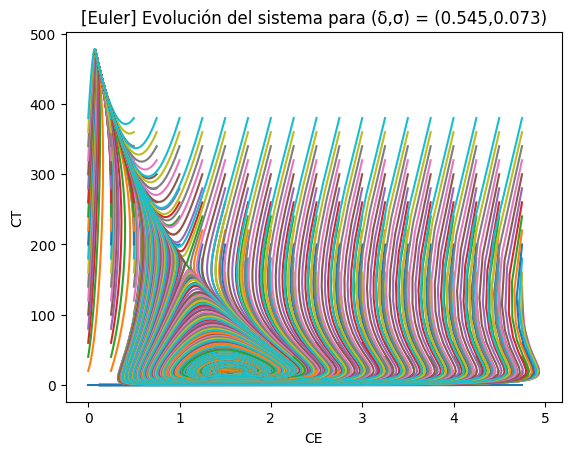

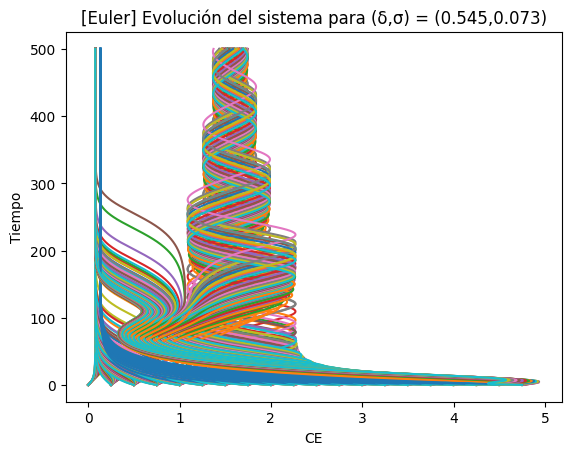

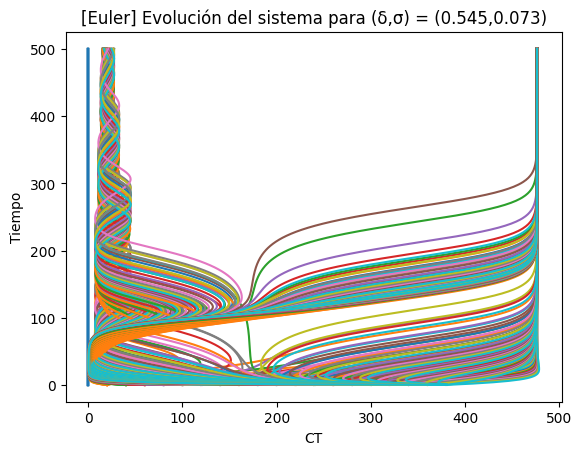

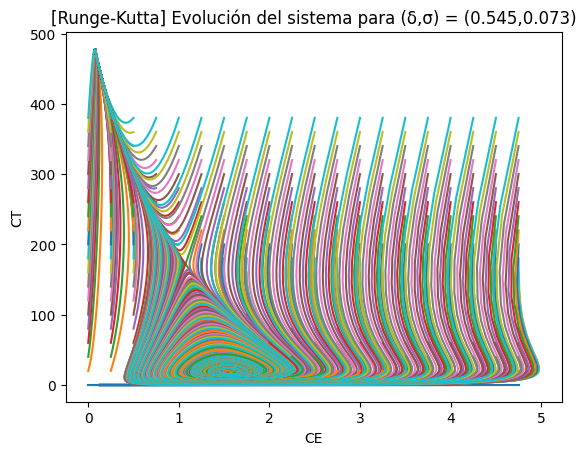

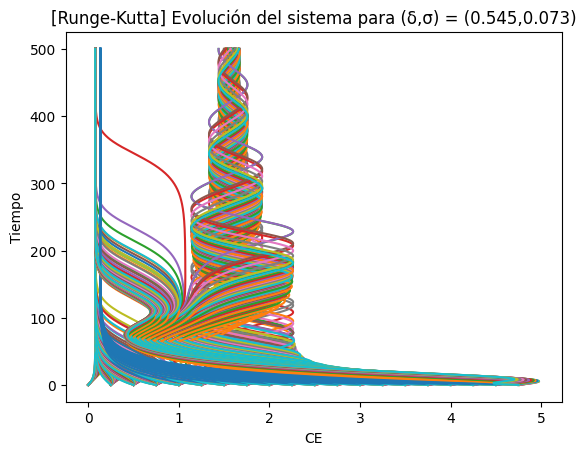

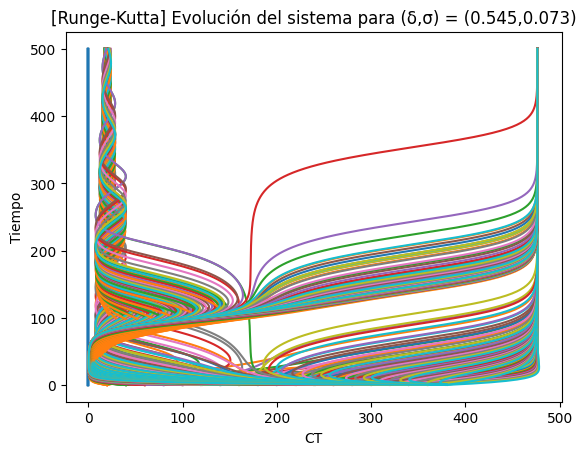

In [15]:
# Importar librerias necesarias
import matplotlib.pyplot as plt
from numpy import *

# Definición de parámetros
α = 1.636
β = 0.002
ρ = 1.131
η = 20.19
µ = 0.00311

# Resuelve el sistema de 2 ODE dx/dt=f(t,x,y) dy/dt=g(t,x,y) mediante el método de Euler
# f,g: funciones de t,x,y
# t,x,y: condiciones iniciales
# n cantidad de iteraciones
# h: tamaño del paso
def EulerSystemODE2(f,g,t0,x0,y0,n,h,ax1,ax2,ax3):
    tEnd = t0+(n-1)*h

    t = arange(t0, tEnd+h, h)
    x = zeros(len(t))
    y = zeros(len(x))
    ts=zeros(len(x))

    x[0] = x0
    y[0] = y0
    ts[0]= 0

    for i in range(0, t.size-1):
        x[i+1] = x[i] + h*f(t[i], x[i], y[i])
        y[i+1] = y[i] + h*g(t[i], x[i], y[i])
        ts[i+1]=i+1

    # Create the first figure
    ax1.plot(x, y)
    ax2.plot(x, ts)
    ax3.plot(y,ts)


# Resuelve el sistema de 2 ODE dx/dt=f(t,x,y) dy/dt=g(t,x,y) mediante el método de Runge-Kutta de cuarto orden
# f,g: funciones de t,x,y
# t,x,y: condiciones iniciales
# n cantidad de iteraciones
# h: tamaño del paso
def RK4SystemODE2(f,g,t,x,y,n,h,ax1,ax2,ax3):
    X=[x]
    Y=[y]
    TS=[]
    
    for i in range(0,n):
        k0=h*f(t,x,y)
        l0=h*g(t,x,y)
        k1=h*f(t+h/2,x+k0/2,y+l0/2)
        l1=h*g(t+h/2,x+k0/2,y+l0/2)
        k2=h*f(t+h/2,x+k1/2,y+l1/2)
        l2=h*g(t+h/2,x+k1/2,y+l1/2)
        k3=h*f(t+h,x+k2,y+l2)
        l3=h*g(t+h,x+k2,y+l2)
        t=t+h
        x=x+(k0+2*k1+2*k2+k3)/6
        y=y+(l0+2*l1+2*l2+l3)/6
        X=X+[x]
        Y=Y+[y]

    cont=0
    for i in X:
        TS.append(cont)
        cont+=1

    ax1.plot(X, Y)
    ax2.plot(X, TS)
    ax3.plot(Y,TS)

# Prueba el método numérico dado para el sistema de Kuznetsov y Taylor para valores (δ,σ) desde varios puntos iniciales (matriz)
# numericMethod: método numérico a utilizar (RK4 o Euler)
# δ,σ: parámetros del sistema
# x,y: límites de la matriz
# p: cantidad de filas y columnas de la matriz
# n: cantidad de iteraciones
# h: tamaño del paso
def Simulation(numericMethod,δ,σ,x,y,p,n,h):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel("CE")
    ax1.set_ylabel("CT")
    ax1.set_title("["+numericMethod[0]+"] Evolución del sistema para (δ,σ) = ("+str(δ)+","+str(σ)+")")

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_xlabel("CE")
    ax2.set_ylabel("Tiempo")
    ax2.set_title("["+numericMethod[0]+"] Evolución del sistema para (δ,σ) = ("+str(δ)+","+str(σ)+")")

    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111)
    ax3.set_xlabel("CT")
    ax3.set_ylabel("Tiempo")
    ax3.set_title("["+numericMethod[0]+"] Evolución del sistema para (δ,σ) = ("+str(δ)+","+str(σ)+")")

    ce=lambda t,x,y : σ + ρ*x*y/(η + y) - µ*x*y - δ*x
    ct=lambda t,x,y : α*y*(1 - β*y) - x*y
    i=0
    while i<y:
        j=0
        while j<x:
            numericMethod[1](ce,ct,0,i,j,n,h,ax1,ax2,ax3)
            j+=x/p
        i+=y/p
        
    plt.show()

# Ejemplos de pares (δ,σ) del artículo "Modelos matemáticos de competición entre cáncer y sistema inmune"
examples=[
    [0.1908,0.318],
    [0.545,0.318],
    [0.545,0.182],
    [0.009,0.045],
    [0.545,0.073]
]

# Métodos numéricos implementados
numericMethods=[
    ["Euler",EulerSystemODE2],
    ["Runge-Kutta",RK4SystemODE2]
]

# Compara ambos métodos para un ejemplo (δ,σ) dado
def Compare(example):
    delta=example[0]
    sigma=example[1]
    Simulation(numericMethods[0],delta,sigma,400,5,20,500,0.1)
    Simulation(numericMethods[1],delta,sigma,400,5,20,500,0.1)

# Compara los métodos para todos los ejemplos
def CompareAll():
    for example in examples:
        Compare(example)

CompareAll()